In [1]:
BASE = './bytecup2016data'
IINFO = BASE + '/invited_info_train.txt'
QINFO = BASE + '/question_info.txt'
UINFO = BASE + '/user_info.txt'
VAL = BASE + '/validate_nolabel.txt'
TEST = BASE + '/test_nolabel.txt

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
invdata = pd.read_csv(IINFO, delim_whitespace=True, header=None, names=["qid", "uid", "answered"])
qdata   = pd.read_csv(QINFO, delim_whitespace=True, header=None, names=["qid", "qtag", "wseq", "cseq", "nvotes", "nans", "ntqans"])
udata   = pd.read_csv(UINFO, delim_whitespace=True, header=None, names=["uid", "exptag", "wseq", "cseq"])
valdata = pd.read_csv(VAL)

In [4]:
udata = pd.read_csv(UINFO, delim_whitespace=True, header=None, names=["uid", "exptag", "wseq", "cseq"])

# Questions

In [24]:
# Summarizing question info

# How many questions are there
print "No of questions : ", qdata.shape[0]
sum(qdata.nans)

No of questions :  8095


330121

In [6]:
# Tag info
tags = np.unique(qdata.qtag)
print "Tags : ", tags
print "No. of tags: ", len(tags)
print "\n"

qtag_dist = qdata.groupby("qtag").count()["qid"]
# print qtag_dist #To print the tag distribution 

'''
plt.xticks(range(20), range(20))
plt.xlabel("Tag ID")
plt.ylabel("No. of questions")
plt.title("Question - Tag distribution")
plt.bar(range(len(qtag_dist)), qtag_dist) #To plot the tag distribution
'''


Tags :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
No. of tags:  20




'\nplt.xticks(range(20), range(20))\nplt.xlabel("Tag ID")\nplt.ylabel("No. of questions")\nplt.title("Question - Tag distribution")\nplt.bar(range(len(qtag_dist)), qtag_dist) #To plot the tag distribution\n'

In [7]:
qtag_dist.describe()

count     20.000000
mean     404.750000
std      209.029052
min      108.000000
25%      255.750000
50%      384.500000
75%      559.500000
max      837.000000
Name: qid, dtype: float64

In [8]:
import collections

No of word IDs:  13232


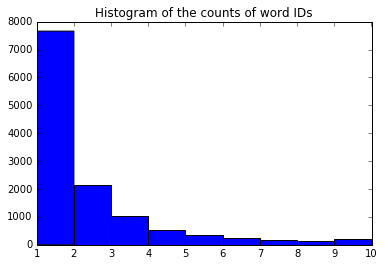

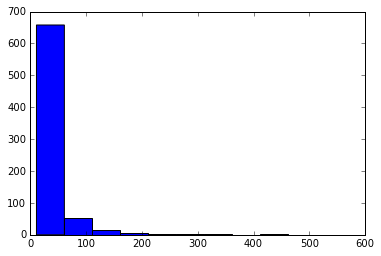

In [22]:
# Word IDs distribution
wid_dist = collections.Counter(qdata.wseq.str.cat(sep="/").split("/"))
# print wid_dist 

# No of unique word_ids
print "No of word IDs: ", len(wid_dist.keys())

# Histogram of the counts of word IDs
plt.title("Histogram of the counts of word IDs")
plt.hist(wid_dist.values(), bins = range(1, 11))
plt.show()

plt.hist(wid_dist.values(), bins=range(11, 600, 50))
plt.show()

No of character IDs:  2960


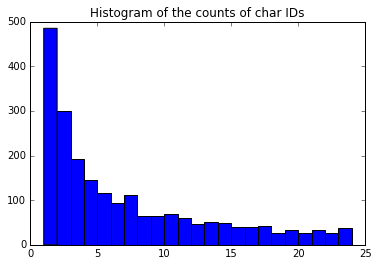

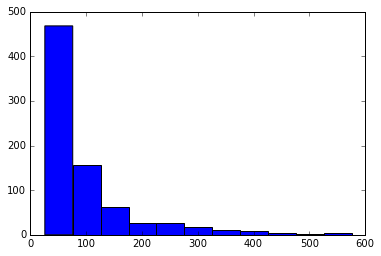

In [23]:
# Character ID distribution
cid_dist = collections.Counter(qdata.cseq.str.cat(sep="/").split("/"))
# print cid_dist

# No of unique character IDs
print "No of character IDs: ", len(cid_dist.keys())

# Histogram of the counts of word IDs
plt.title("Histogram of the counts of char IDs")
plt.hist(cid_dist.values(), bins = range(1, 25))
plt.show()

plt.hist(cid_dist.values(), bins=range(26, 600, 50))
plt.show()

# Users

In [11]:
# No of users
print udata.shape[0]

28763


In [12]:
# Expert tags
tags = np.unique(udata.exptag.str.cat(sep="/").split("/"))
print "Tags : ", tags
print "No. of tags: ", len(tags)

Tags :  ['0' '1' '10' '100' '101' '102' '103' '104' '105' '106' '107' '108' '109'
 '11' '110' '111' '112' '113' '114' '115' '116' '117' '118' '119' '12'
 '120' '121' '122' '123' '124' '125' '126' '127' '128' '129' '13' '130'
 '131' '132' '133' '134' '135' '136' '137' '138' '139' '14' '140' '141'
 '142' '15' '16' '17' '18' '19' '2' '20' '21' '22' '23' '24' '25' '26' '27'
 '28' '29' '3' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '4' '40'
 '41' '42' '43' '44' '45' '46' '47' '48' '49' '5' '50' '51' '52' '53' '54'
 '55' '56' '57' '58' '59' '6' '60' '61' '62' '63' '64' '65' '66' '67' '68'
 '69' '7' '70' '71' '72' '73' '74' '75' '76' '77' '78' '79' '8' '80' '81'
 '82' '83' '84' '85' '86' '87' '88' '89' '9' '90' '91' '92' '93' '94' '95'
 '96' '97' '98' '99']
No. of tags:  143


No of word IDs:  31100


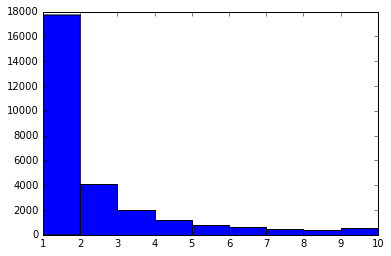

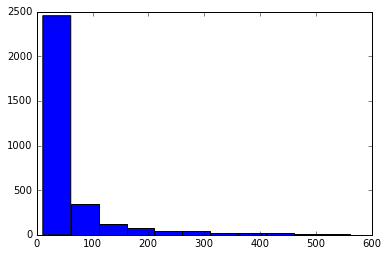

In [13]:
# Word IDs distribution
uwid_dist = collections.Counter(udata.wseq.str.cat(sep="/").split("/"))
# print wid_dist 

# No of unique word_ids
print "No of word IDs: ", len(uwid_dist.keys())

# Histogram of the counts of word IDs
plt.hist(uwid_dist.values(), bins = range(1, 11))
plt.show()

plt.hist(uwid_dist.values(), bins=range(11, 600, 50))
plt.show()

No of character IDs:  3779


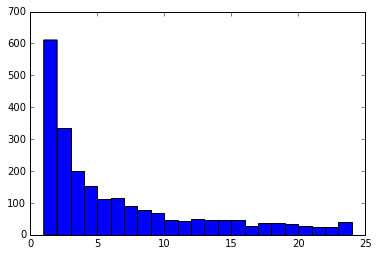

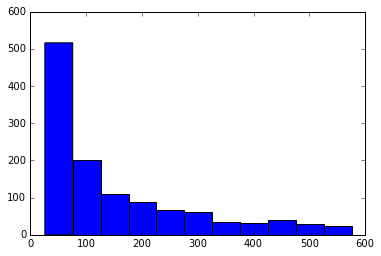

In [14]:
# Character ID distribution
ucid_dist = collections.Counter(udata.cseq.str.cat(sep="/").split("/"))
# print cid_dist

# No of unique character IDs
print "No of character IDs: ", len(ucid_dist.keys())

# Histogram of the counts of word IDs
plt.hist(ucid_dist.values(), bins = range(1, 25))
plt.show()

plt.hist(ucid_dist.values(), bins=range(26, 600, 50))
plt.show()

# Invited Info

In [15]:
# No of entries
print invdata.shape[0]

# Answered/Unanswered
print "Num. answered :", invdata.groupby("answered").count()["qid"]

245752
Num. answered : answered
0    218428
1     27324
Name: qid, dtype: int64


In [16]:
# Lets group by user and see stats
# invdata.groupby(["uid", "answered"]).count()

In [17]:
inv_user = np.unique(invdata.uid)
val_user = np.unique(valdata.uid)

In [18]:
print inv_user.shape,val_user.shape

(27127L,) (13088L,)


In [19]:
inv_user_set = set(inv_user.tolist())
val_user_set = set(val_user.tolist())

In [20]:
strange_usr =  val_user_set - inv_user_set

In [21]:
print len(strange_usr)
valdata_uid = valdata.uid.tolist()
print type(valdata_uid)

810
<type 'list'>


In [22]:
counts = [valdata_uid.count(x) for x in set(strange_usr)]

In [23]:
print sum(counts)

856
